# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,256,91,36,77,157,56,7,155,42,19,126,177,361,123,65,8,15,195,201
1,727,96,44,68,190,70,7,155,41,19,145,179,372,166,67,5,7,202,206
2,838,95,43,76,142,57,10,151,44,19,149,173,339,159,71,2,23,187,200
3,674,92,37,80,180,67,8,154,43,19,129,180,353,144,69,6,9,190,195
4,403,96,39,77,160,62,8,140,47,18,150,161,294,124,62,15,3,201,208
5,762,90,44,69,152,64,7,135,49,18,145,165,272,162,75,3,2,187,191
6,73,73,37,53,111,54,6,126,55,18,128,135,227,147,82,1,15,176,184
7,730,101,55,107,200,61,11,225,30,25,178,228,730,204,74,8,35,187,201
8,54,101,56,104,185,53,6,257,26,28,168,275,956,230,83,5,26,180,184
9,427,86,38,89,176,59,9,169,39,20,132,190,428,148,67,7,33,193,202


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,429.351548,93.703097,44.746812,81.657559,168.832423,61.770492,8.502732,168.400729,41.065574,20.564663,147.712204,188.247723,438.242259,174.020036,72.417122,6.322404,12.770492,188.979964,195.610200
std,243.025378,8.298998,6.254313,15.774738,33.555994,7.891958,4.411590,33.774473,7.911882,2.632252,14.583796,32.166206,179.950311,33.204651,7.475444,4.905668,8.888716,6.247741,7.490941
min,0.000000,73.000000,33.000000,44.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,132.000000,192.000000,109.000000,59.000000,0.000000,0.000000,176.000000,182.000000
25%,221.000000,87.000000,39.000000,70.000000,141.000000,57.000000,6.000000,146.000000,34.000000,19.000000,136.000000,167.000000,317.000000,148.000000,67.000000,2.000000,6.000000,184.000000,190.000000
50%,442.000000,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,365.000000,173.000000,71.000000,5.000000,11.000000,189.000000,197.000000
75%,639.000000,100.000000,49.000000,96.000000,195.000000,65.000000,10.000000,195.000000,46.000000,22.000000,159.000000,214.000000,576.000000,197.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,844.000000,119.000000,58.000000,110.000000,333.000000,138.000000,52.000000,265.000000,59.000000,29.000000,182.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,40.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
# Ну... Вообще всегда рекумендуют нормализовать данные, т.е. привести их к нормальному закону, т.е. вычесть матожидание и разделить на дисперсию.
# Сделаем это с помощью scipy.stats.zscore

import scipy

X_train = scipy.stats.zscore(X_train)
X_test = scipy.stats.zscore(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [9]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

defaultLogisticParams = {
  'multi_class': 'multinomial',
  'solver': 'saga',
  'tol': 1e-3,
  'max_iter': 1000   # 1000, потому что при значении 500 вываливаются ворнинги
}

model = LogisticRegression(**defaultLogisticParams)

wantedLogisticParams = {
  'penalty': ['l1', 'l2'],        # значение elasticnet проигнорируем, т.к. оно требует параметра l1_ratio из-за чего появлется куча ворнингов
  'fit_intercept': [True, False],
  'C': np.arange(0.1, 2.0, 0.1),
  'n_jobs': [4]                   # захардкодим количество ядер просто так
}

gs = GridSearchCV(model, wantedLogisticParams)
gs.fit(X_train, y_train)

resolvedLogisticParams = gs.best_params_

print(resolvedLogisticParams)

{'C': 1.5000000000000002, 'fit_intercept': True, 'n_jobs': 4, 'penalty': 'l1'}


**Итого**

Выполнили подборку гиперпараметров `penalty`, `fit_intercept` и `С` класса `LogisticRegression` с помощью класса `GridSearchCV`.

Получили следующие значения искомых параметров:
```json
{'C': 1.5000000000000002, 'fit_intercept': False, 'n_jobs': 4, 'penalty': 'l1'}
```

In [10]:
from sklearn.metrics import accuracy_score, f1_score

model = LogisticRegression(**defaultLogisticParams, **resolvedLogisticParams)
model.fit(X_train, y_train)
result = model.predict(X_test)

print(f"Acuracy: {accuracy_score(y_test, result)}")
print(f"F1 score: {f1_score(y_test, result, average='macro')}")

Acuracy: 0.7676767676767676
F1 score: 0.7675459170258261


Видим, что значения accuracy и f1 score почти совпадают и имеют достаточно высокое значение, хотя и не идеальные.

In [11]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

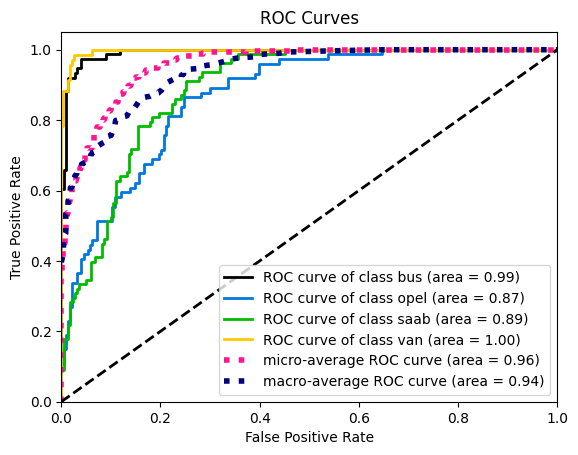

In [12]:
from scikitplot.metrics import plot_roc

probs = model.predict_proba(X_test)
plot_roc(y_test, probs)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

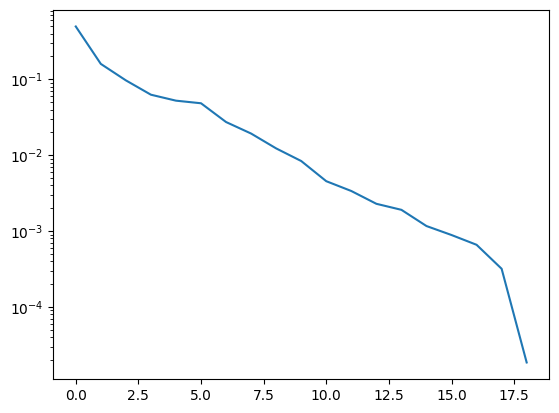

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pcaComponents = pca.fit(X_train)

plt.yscale('log')
plt.plot(pca.explained_variance_ratio_)


#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [14]:
pca = PCA(n_components=10)
pcaTrain = pca.fit_transform(X_train)
pcaTest = pca.transform(X_test)

Данные нормализовывать не надо, т.к. их уже нормализовали раннее.

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

{'C': 0.5, 'fit_intercept': True, 'n_jobs': 4, 'penalty': 'l1'}
Acuracy: 0.7003367003367004
F1 score: 0.6946141789245237


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

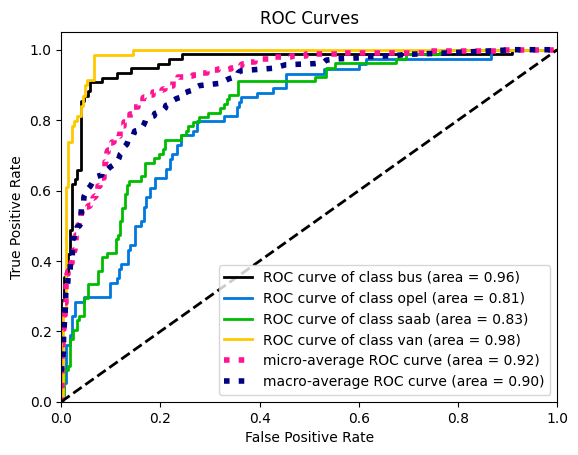

In [15]:
model = LogisticRegression(**defaultLogisticParams)

gs = GridSearchCV(model, wantedLogisticParams)
gs.fit(pcaTrain, y_train)

pcaResolvedLogisticParams = gs.best_params_

print(pcaResolvedLogisticParams)

model = LogisticRegression(**defaultLogisticParams, **pcaResolvedLogisticParams)
model.fit(pcaTrain, y_train)
result = model.predict(pcaTest)

print(f"Acuracy: {accuracy_score(y_test, result)}")
print(f"F1 score: {f1_score(y_test, result, average='macro')}")

probs = model.predict_proba(pcaTest)
plot_roc(y_test, probs)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

{'max_depth': 9}
Acuracy: 0.7474747474747475
F1 score: 0.7473564076360835


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

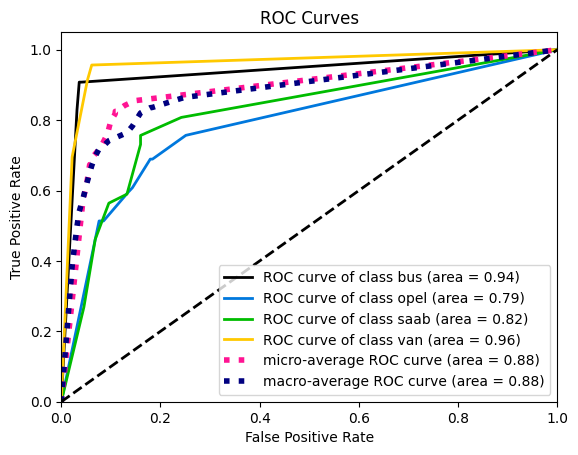

In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

wantedTreeParams = {
  'max_depth': np.arange(1, 10, 1)
}

gs = GridSearchCV(model, wantedTreeParams)
gs.fit(X_train, y_train)

resolvedTreeParams = gs.best_params_

print(resolvedTreeParams)

model = DecisionTreeClassifier(**resolvedTreeParams)
model.fit(X_train, y_train)
result = model.predict(X_test)

print(f"Acuracy: {accuracy_score(y_test, result)}")
print(f"F1 score: {f1_score(y_test, result, average='macro')}")

probs = model.predict_proba(X_test)
plot_roc(y_test, probs)

Очевидно, что работа классификатора решающего дерева намного быстрее, чем классификатора логистической регрессии, хотя результаты мы получили хуже.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [27]:
from sklearn.ensemble import BaggingClassifier

N_min = 2
N_max = 100
N = range(N_min, N_max, 5)

bgRegAccuracy = []
bgRegF1 = []

bgTreAccuracy = []
bgTreF1 = []

def makeBagging(**kwargs):
    bagging = BaggingClassifier(**kwargs)
    bagging.fit(X_train, y_train)
    y_pred = bagging.predict(X_test)
    return accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='macro')

for n in N:
    regression = LogisticRegression(**defaultLogisticParams, **resolvedLogisticParams)
    acc, f1 = makeBagging(estimator=regression, n_estimators=n, max_samples=N_max)

    bgRegAccuracy.append(acc)
    bgRegF1.append(f1)

    tree = DecisionTreeClassifier(**resolvedTreeParams)
    acc, f1 = makeBagging(estimator=tree, n_estimators=n, max_samples=N_max)

    bgTreAccuracy.append(acc)
    bgTreF1.append(f1)

In [104]:
def plotScores(x, acc, f1, title):
    plt.plot(x, acc, color='red')
    plt.plot(x, f1, color='blue')
    plt.legend(['Accuracy score', 'F1 score'])
    plt.title(title)

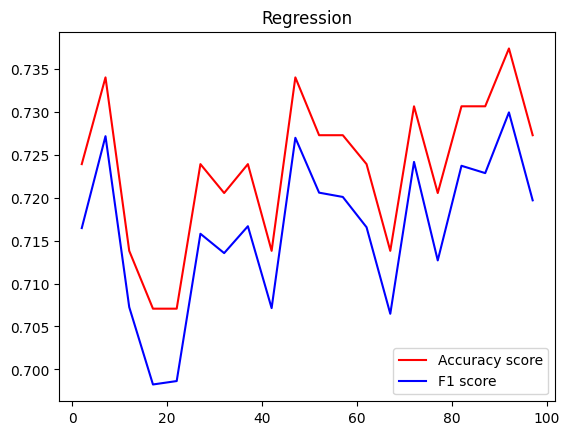

In [105]:
plotScores(N, bgRegAccuracy, bgRegF1, 'Regression')

Из график видно, что точность наших предсказаний колебается в пределах от 0.7 до 0.735, что означает, что в целом предсказания довольно стабильные на всем диапазоне количеств моделей. Небольшие флуктуации наверное обусловлены самими данными. Оптимальным значением числа моделей является среднее значение, которое равно приблизительно 50, т.к. это значение не максимально большое, а также промежуток между значениями 45-55 является стабильным в том смысле, что мы наблюдаем хороший уровень предсказаний на нем. В начале графика мы тоже видим хорошее значение accuracy, но лишь для одного значения, после чего accuracy резко падает, что не позволяет нам использовать значение количества моделей на этом учатске.

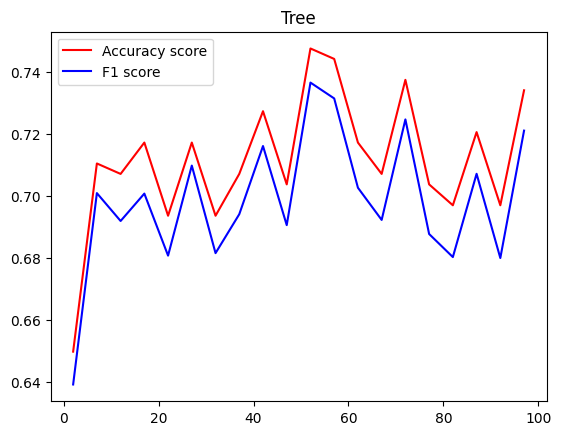

In [106]:
plotScores(N, bgTreAccuracy, bgTreF1, 'Tree')

Для деревьев картинка похожая и даже более явная. В середине графика мы видим наилучший стабильный участок предсказаний в диапазоне 50-55, что позволяет нам тоже выбрать значение 50 как оптимальное.

Также можно заметить, что только на этом участке качество предсказания достигает того же значения, что и на одиночном дереве. Т.е. получить значительно лучших результатов предсказания используя ансамбль, конкретно в этом случае, не удалось. А это может означать, что значения гиперпараметров, которые мы получили в пункте 2.5 для одиночного дерева не являются оптимальными для ансамбля.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

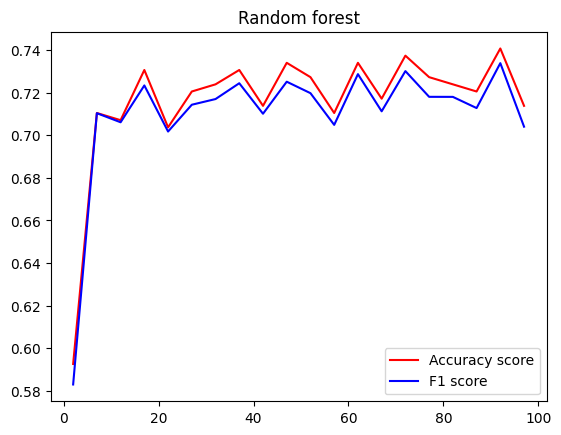

In [107]:
from sklearn.ensemble import RandomForestClassifier

rfAccuracy = []
rfF1 = []

for n in N:
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    result = model.predict(X_test)

    rfAccuracy.append(accuracy_score(result, y_test))
    rfF1.append(f1_score(result, y_test, average='macro'))

plotScores(N, rfAccuracy, rfF1, 'Random forest')

Из графика видно, что оптимальное значение количества деревьев почти такое же, как и в предыдущих случаях и находится в районе 40-55.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [102]:
# y_tain_parts = np.split(y_train, 10)
# X_tain_parts = np.split(X_train, 10, axis=-1)

def generate_data_parts(x, y):
    allIdx = np.arange(x.shape[0])
    np.random.shuffle(allIdx)

    originLen = len(allIdx)
    roundLen = int(originLen/10)*10

    vastIdx = allIdx[:roundLen]
    restIdx = allIdx[roundLen:]

    # здесь мы получаем массив массивов индексов размер которого кратен 10
    vastIdxParts = np.split(vastIdx, 10)

    # добавляем оставшиеся индексы в конец элементов массива массивов индексов
    total = len(vastIdxParts)
    for i in reversed(range(len(restIdx))):
        vastIdxParts[i] = np.append(vastIdxParts[i], restIdx[i])

    xResult = []
    yResult = []
    # генерируем выборки разной длины
    for i in range(len(vastIdxParts)):
        idx = [x for xs in vastIdxParts[:i+1] for x in xs]
        xResult.append(x[idx])
        yResult.append(y[idx])

    return xResult, yResult


logregAcc = []
logregF1 = []

treeAcc = []
treeF1 = []

forestAcc = []
forestF1 = []

def makePrediction(model, x, y, x_test, y_test):
    model.fit(x, y)
    result = model.predict(x_test)
    acc = accuracy_score(result, y_test)
    f1 = f1_score(result, y_test, average='macro')

    return acc, f1


x, y = generate_data_parts(X_train, y_train)

for i in range(len(x)):
    xCurrentTrain = x[i]
    yCurrentTrain = y[i]

    model = LogisticRegression(**defaultLogisticParams, **resolvedLogisticParams)
    acc, f1 = makePrediction(model, xCurrentTrain, yCurrentTrain, X_test, y_test)
    logregAcc.append(acc)
    logregF1.append(f1)

    model = DecisionTreeClassifier(**resolvedTreeParams)
    acc, f1 = makePrediction(model, xCurrentTrain, yCurrentTrain, X_test, y_test)
    treeAcc.append(acc)
    treeF1.append(f1)

    model = RandomForestClassifier()
    acc, f1 = makePrediction(model, xCurrentTrain, yCurrentTrain, X_test, y_test)
    forestAcc.append(acc)
    forestF1.append(f1)

def printResult(acc, f1, title):
    print(title)
    print(f"\taccuracy:\t {', '.join(['%.2f' % a for a in acc])}")
    print(f"\tf1:\t\t {', '.join(['%.2f' % f for f in f1])}")

printResult(logregAcc, logregF1, 'Regression')
printResult(treeAcc, treeF1, 'Tree')
printResult(forestAcc, forestF1, 'Forest')

Regression
	accuracy:	 0.67, 0.72, 0.75, 0.74, 0.76, 0.76, 0.76, 0.75, 0.77, 0.77
	f1:		 0.67, 0.72, 0.74, 0.73, 0.76, 0.76, 0.76, 0.75, 0.77, 0.77
Tree
	accuracy:	 0.48, 0.56, 0.60, 0.60, 0.61, 0.65, 0.63, 0.67, 0.71, 0.71
	f1:		 0.49, 0.56, 0.60, 0.59, 0.61, 0.64, 0.63, 0.67, 0.71, 0.71
Forest
	accuracy:	 0.60, 0.68, 0.71, 0.73, 0.74, 0.74, 0.72, 0.72, 0.72, 0.73
	f1:		 0.61, 0.68, 0.70, 0.72, 0.73, 0.73, 0.71, 0.72, 0.71, 0.72


In [109]:
X_SCALE = [len(xs) for xs in x]

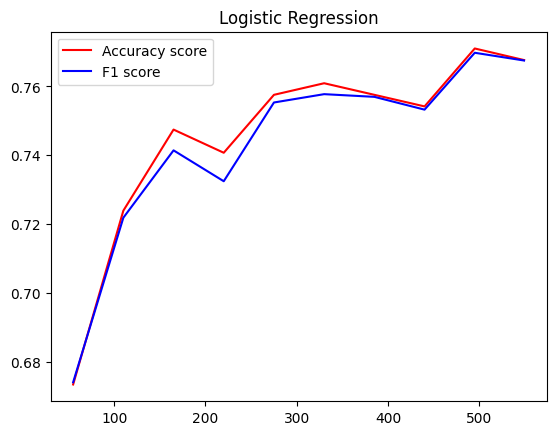

In [111]:
plotScores(X_SCALE, logregAcc, logregF1, 'Logistic Regression')

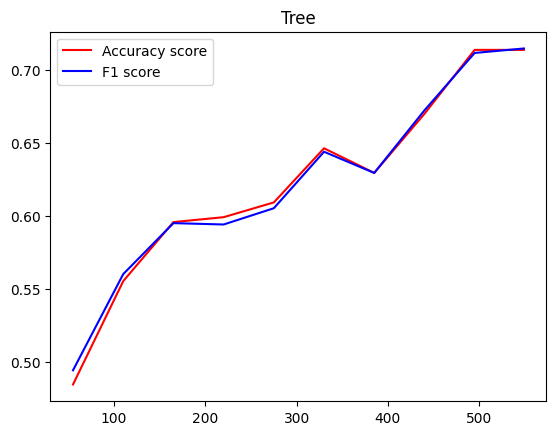

In [112]:
plotScores(X_SCALE, treeAcc, treeF1, 'Tree')

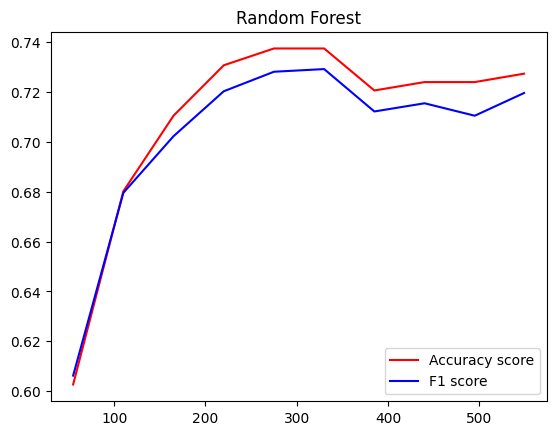

In [113]:
plotScores(X_SCALE, forestAcc, forestF1, 'Random Forest')

In [ ]:
По всем графикам очевидно, что с ростом выборки растет и качество предсказаний.